# iMAD Test

In [2]:
run scripts/iMad -h


Usage:
-----------------------------------------------------
python scripts/iMad.py [-h] [-n] [-i max iterations] [-p bandPositions] 
[-d spatialDimensions] filename1 filename2
-----------------------------------------------------
bandPositions and spatialDimensions are lists, 
e.g., -p [1,2,3] -d [0,0,400,400]
-n stops any graphics output
-----------------------------------------------------
The output MAD variate file is has the same format
as filename1 and is named

      path/MAD(filebasename1-filebasename2).ext1
      
where filename1 = path/filebasename1.ext1
      filename2 = path/filebasename2.ext2

For ENVI files, ext1 or ext2 is the empty string.       
-----------------------------------------------------


------------IRMAD -------------
Fri Feb  2 09:05:01 2018
time1: imagery/20010525
time2: imagery/20010626
rho: [ 0.66348058  0.72875458  0.86325872  0.96825212  0.992544    0.99534643]
result written to: imagery/MAD(20010525-20010626)
elapsed time: 39.9686179161


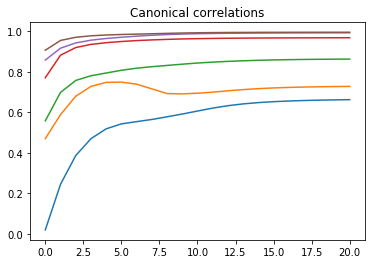

In [4]:
run scripts/iMad imagery/20010525 imagery/20010626

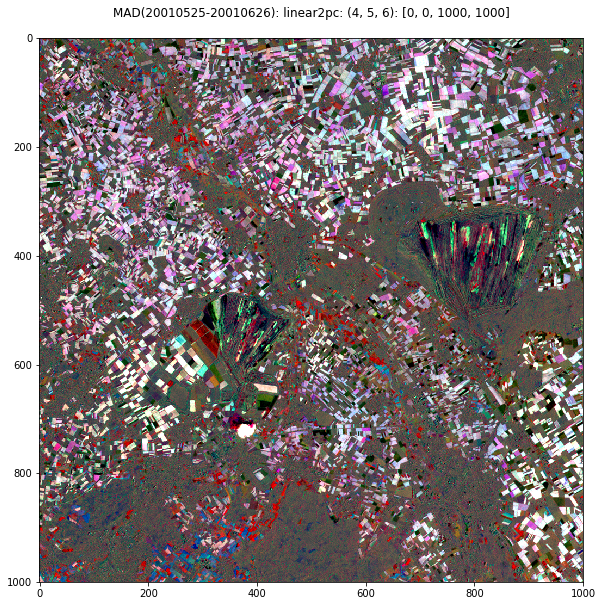

In [6]:
run scripts/dispms -f imagery/MAD(20010525-20010626) -e 3 -p [4,5,6]

In [86]:
import numpy as np
import gdal
from scipy import stats
from osgeo.gdalconst import GDT_Float32, GA_ReadOnly
inDataset = gdal.Open('imagery/MAD(20010525-20010626)',GA_ReadOnly)
cols = inDataset.RasterXSize
rows = inDataset.RasterYSize    
madbands = inDataset.RasterCount-1
mads = np.zeros((rows*cols,madbands))
for b in range(madbands):
    band = inDataset.GetRasterBand(b+1)
    mads[:,b] = band.ReadAsArray(0,0,cols,rows)\
                              .astype(float).ravel()
band = inDataset.GetRasterBand(madbands+1) 
chisqr = band.ReadAsArray(0,0,cols,rows)\
                              .astype(float).ravel()
pval = 1.0 - stats.chi2.cdf(chisqr,[madbands]) 
idx = np.where(pval>0.0001)[0]
mads[idx,:] = 0.0
mads = np.reshape(mads,(rows,cols,madbands))
driver = inDataset.GetDriver()
outDataset = driver.Create('imagery/tst',
                cols,rows,madbands,GDT_Float32)
for k in range(madbands):        
        outBand = outDataset.GetRasterBand(k+1)
        outBand.WriteArray(mads[:,:,k],0,0) 
        outBand.FlushCache()
inDataset = None
outDataset = None

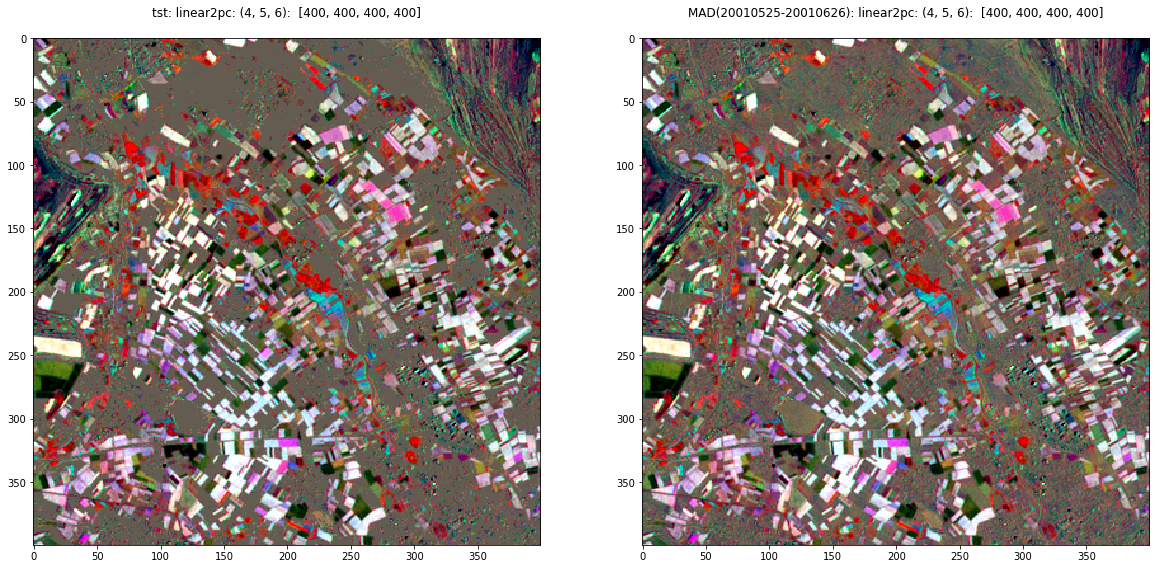

In [87]:
run scripts/dispms -f imagery/tst -e 3 -p [4,5,6] -d [400,400,400,400] \
-F imagery/MAD(20010525-20010626) -E 3 -P [4,5,6] -D [400,400,400,400]